In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/lazyXghost/Bio-Hazard cloned-repo
%cd cloned-repo
!ls

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
twitterData = pd.read_csv("/content/cloned-repo/DataDashTrainingData - TwitterData.csv")

In [14]:
twitterData = twitterData.drop(['name', 'date', 'tweets','chatter', 'following'], axis='columns')
twitterData = twitterData.interpolate(method = 'linear')
twitterData_train, twitterData_test = train_test_split(twitterData, test_size = 0.3, random_state = 2)

In [16]:
train_data_for_rank1 = twitterData_train.iloc[:,:7]
test_data_for_rank1 = twitterData_test.iloc[:,:7]

train_data_for_rank2 = twitterData_train.iloc[:,:8]
test_data_for_rank2 = twitterData_test.iloc[:,:8]

train_data_for_rank3 = twitterData_train
test_data_for_rank3 = twitterData_test

In [77]:
# importing modules
from sklearn.preprocessing import StandardScaler

# reading data from csv file
train_dfr1 = train_data_for_rank1
x_train_dfr1 = train_dfr1[train_dfr1.columns[:len(train_dfr1.columns) - 1]]
y_train_dfr1 = train_dfr1[train_dfr1.columns[-1]]

test_dfr1 = test_data_for_rank1
x_test_dfr1 = test_dfr1[test_dfr1.columns[:len(test_dfr1.columns) - 1]]
y_test_dfr1 = test_dfr1[test_dfr1.columns[-1]]

x_train_dfr1_reduced = StandardScaler().fit_transform(x_train_dfr1.values)  # corrected standardized data
x_test_dfr1_reduced = StandardScaler().fit_transform(x_test_dfr1.values)  # corrected standardized data


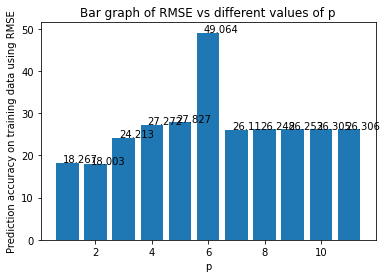

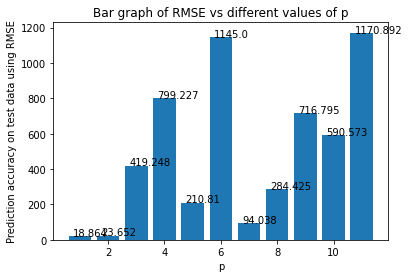

In [39]:
def nonlinearRegression:
  # # importing modules
  # import numpy as np
  # import pandas as pd
  # from sklearn.model_selection import train_test_split as tts
  # from sklearn.preprocessing import PolynomialFeatures
  # from sklearn.linear_model import LinearRegression
  # import matplotlib.pyplot as plt
  # from sklearn import metrics

  # x_train = x_train_dfr1
  # y_train = y_train_dfr1
  # x_test = x_test_dfr1
  # y_test = y_test_dfr1

  # # declaring dictionaries to store the train and test prediction data
  # y_pred_train_allp = {}
  # y_pred_test_allp = {}
  # pred_accuracy_train = {}
  # pred_accuracy_test = {}

  # p_values = [1, 2, 3, 4, 5, 6, 7, 8,9, 10, 11]
  # for p in p_values:
  #     # defining and training the model
  #     x_train_poly = PolynomialFeatures(p).fit_transform(x_train)
  #     x_test_poly = PolynomialFeatures(p).fit_transform(x_test)

  #     regressor = LinearRegression()
  #     regressor.fit(x_train_poly, y_train)

  #     # model testing
  #     y_pred_train = regressor.predict(x_train_poly)
  #     y_pred_train_allp[p] = y_pred_train
  #     train_error = metrics.mean_squared_error(y_train, y_pred_train)**0.5
  #     pred_accuracy_train[p] = train_error

  #     y_pred_test = regressor.predict(x_test_poly)
  #     y_pred_test_allp[p] = y_pred_test
  #     test_error = metrics.mean_squared_error(y_test, y_pred_test)**0.5
  #     pred_accuracy_test[p] = test_error

  # # plotting bar plot of prediction accuracy for training data for different p values
  # plt.bar(p_values, pred_accuracy_train.values())
  # for i, v in enumerate(pred_accuracy_train.values()):
  #     plt.text(p_values[i] - 0.15, v + 0.015, str(round(v, 3)))
  # plt.xlabel('p')
  # plt.ylabel('Prediction accuracy on training data using RMSE')
  # plt.title("Bar graph of RMSE vs different values of p")
  # plt.show()

  # # plotting bar plot of prediction accuracy for test data for different p values
  # plt.bar(p_values, pred_accuracy_test.values())
  # for i, v in enumerate(pred_accuracy_test.values()):
  #     plt.text(p_values[i] - 0.25, v + 0.015, str(round(v, 3)))
  # plt.xlabel('p')
  # plt.ylabel('Prediction accuracy on test data using RMSE')
  # plt.title("Bar graph of RMSE vs different values of p")
  # plt.show()

  # # finding best p value for which the test RMSE is minimum
  # bestP = min(pred_accuracy_test, key=pred_accuracy_test.get)


Training data error is 18.267294900828134
Testing data error is 18.716212505174095


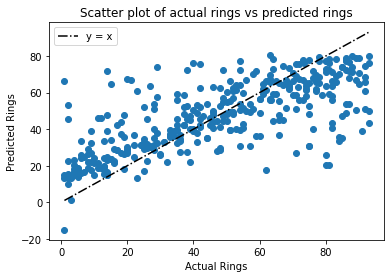

In [78]:
# importing modules
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

# x_train = x_train_dfr1
x_train = x_train_dfr1_reduced
y_train = y_train_dfr1
# x_test = x_test_dfr1
x_test = x_test_dfr1_reduced
y_test = y_test_dfr1

# defining and training the model
reg = LinearRegression().fit(x_train, y_train)
y_pred_train = reg.predict(x_train).reshape(-1)
y_pred_test = reg.predict(x_test).reshape(-1)

# finding the prediction accuracy using RMSE
train_error = metrics.mean_squared_error(y_train, y_pred_train)**0.5
print("Training data error is", train_error)
test_error = metrics.mean_squared_error(y_test, y_pred_test)**0.5
print("Testing data error is", test_error)

# plotting the scatter plot of actual rings vs predicted rings
plt.scatter(y_test, y_pred_test)
x = np.linspace(y_test.min(), y_test.max(), 10)
plt.plot(x, x, linestyle='dashdot', color='k', label='y = x')
plt.title("Scatter plot of actual rings vs predicted rings")
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.legend()
plt.show()


Training data error is 17.951506024832437
Testing data error is 19.02009280829836


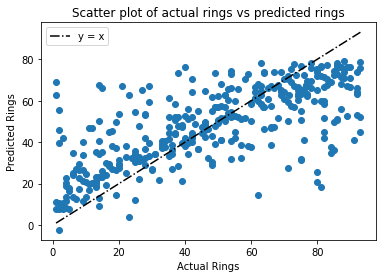

In [79]:
# importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

x_train = x_train_dfr1_reduced
# x_train = x_train_dfr1
y_train = y_train_dfr1
x_test = x_test_dfr1_reduced
# x_test = x_test_dfr1
y_test = y_test_dfr1

# defining and training the model
p = 2
x_train_poly = PolynomialFeatures(p).fit_transform(x_train)
x_test_poly = PolynomialFeatures(p).fit_transform(x_test)
regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)

# model testing
y_pred_train = regressor.predict(x_train_poly)
y_pred_test = regressor.predict(x_test_poly)

# finding the prediction accuracy using RMSE
train_error = metrics.mean_squared_error(y_train, y_pred_train)**0.5
print("Training data error is", train_error)
test_error = metrics.mean_squared_error(y_test, y_pred_test)**0.5
print("Testing data error is", test_error)

# plotting the scatter plot of actual rings vs predicted rings
plt.scatter(y_test, y_pred_test)
x = np.linspace(y_test.min(), y_test.max(), 50)
plt.plot(x, x, linestyle='dashdot', color='k', label='y = x')
plt.title("Scatter plot of actual rings vs predicted rings")
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.legend()
plt.show()

In [ ]:
# from tqdm import tqdm
# model.save("UltimateUltimateHeaven.h5")